In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Regular Expression
import re

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df_train = pd.read_excel('Restaurant_Food_Cost_Train.xlsx')
df_test = pd.read_excel('Restaurant_Food_Cost_Test.xlsx')
print('Training Set Shape ::', df_train.shape, '\nTesting Set Shape ::', df_test.shape)

Training Set Shape :: (12690, 9) 
Testing Set Shape :: (4231, 8)


In [3]:
df_train.to_csv('Restaurant_Food_Cost_train.csv')
df_test.to_csv('Restaurant_Food_Cost_test.csv')

In [4]:
df=df_train.append(df_test, ignore_index=True)
df.head(8)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes
5,Mumbai,800.0,"North Indian, Chinese, Seafood, Biryani",Vile Parle West,4.0,5618,12noon – 12:30AM (Mon-Sun),CASUAL DINING,550 votes
6,Bangalore,600.0,"Cafe, Chinese, Pizza, North Indian, Burger",Koramangala 6th Block,4.1,4383,"12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",CAFÉ,509 votes
7,Gurgaon,1600.0,Bar Food,Sector 29,4.3,1249,1pm – 1am (Mon-Sun),MICROBREWERY,1612 votes


In [5]:
df.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES'],
      dtype='object')

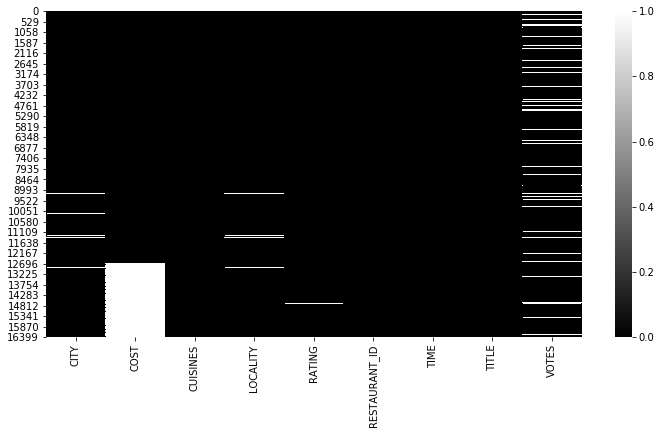

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='gray')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 9 columns):
CITY             16774 non-null object
COST             12690 non-null float64
CUISINES         16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [8]:
df.describe()

,COST,RESTAURANT_ID
count,12690.000000,16921.000000
mean,655.252246,7767.211631
std,627.003540,4493.287626
min,20.000000,0.000000
25%,300.000000,3873.000000
50%,500.000000,7751.000000
75%,800.000000,11672.000000
max,14000.000000,15573.000000


Observations:
    1. Missing values in Locality and City can be replaced as 'Unavailable'.
    2. Will check more details to replace or delete missing rows for Rating and Votes.
    3. Cuisines and Title can be split on ',' and find uniques values.
    4. Restaurant_ID is a unique value for each restaurant and has same restaurants in multiple rows.
    5. Time has to be processed extensively and extract data.

In [9]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print('>> Number of Unique Values ::', df[i].nunique())
        print('>> Number for Null Values ::', df[i].isnull().sum())
        print(df[i].describe(), '\n')
    else:
        print('>> Number of Unique Values ::', df[i].nunique())
        print('>> Number for Null Values ::', df[i].isnull().sum(), '\n')
        print(df[i].unique())

####### CITY #######
>> Number of Unique Values :: 450
>> Number for Null Values :: 147
count       16774
unique        450
top       Chennai
freq         2855
Name: CITY, dtype: object 

####### COST #######
>> Number of Unique Values :: 86
>> Number for Null Values :: 4231
count    12690.000000
mean       655.252246
std        627.003540
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64 

####### CUISINES #######
>> Number of Unique Values :: 5183
>> Number for Null Values :: 0
count            16921
unique            5183
top       North Indian
freq               716
Name: CUISINES, dtype: object 

####### LOCALITY #######
>> Number of Unique Values :: 1636
>> Number for Null Values :: 128
count          16793
unique          1636
top       Gachibowli
freq             216
Name: LOCALITY, dtype: object 

####### RATING #######
>> Number of Unique Values :: 32
>> Number for Null Values :: 4
count   

In [ ]:
sns.pairplot(df)

In [10]:
df['RESTAURANT_ID'].duplicated().sum()

1347

In [11]:
df.pivot_table(index=['RESTAURANT_ID'], aggfunc='size').sort_values(ascending=False)

RESTAURANT_ID
7264     8
4634     8
1619     7
12747    7
7745     7
        ..
10227    1
10226    1
10225    1
10224    1
0        1
Length: 15574, dtype: int64

In [12]:
df[(df['RESTAURANT_ID'].duplicated()==True) & (df['LOCALITY']=='Indiranagar')].head(5)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
146,Bangalore,200.0,Fast Food,Indiranagar,3.7,4634,1pm – 10pm (Mon-Sun),QUICK BITES,78 votes
2701,Bangalore,600.0,"Healthy Food, Beverages",Indiranagar,3.9,5674,8am – 11pm (Mon-Sun),None,196 votes
4647,Bangalore,1600.0,"North Indian, European, Mediterranean, BBQ, Kebab",Indiranagar,4.7,1482,"11:30am – 4pm, 6:30pm – 11pm (Mon-Sun)",CASUAL DINING,7302 votes
4658,Bangalore,800.0,"Biryani, North Indian, Kebab",Indiranagar,4.0,10079,11:30am – 11pm (Mon-Sun),CASUAL DINING,3324 votes
4678,Bangalore,1200.0,"Portuguese, Wraps, Burger, Salad",Indiranagar,4.3,9298,"12noon – 11pm (Mon-Thu),12noon – 1am (Fri-Sun)",CASUAL DINING,1253 votes


In [13]:
df.head(5)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


### Data Cleaning - VOTES

In [14]:
df['VOTES'] = df['VOTES'].str.extract('(\d+)') #.str.split(' ').str[0].fillna(0).astype(int) > this will need strip()

### Data Cleaning - TITLE

In [15]:
# len(('CASUAL DINING,BAR').split(','))
num = 1
for i in df['TITLE']:
    if len(i.split(',')) > num:
        num = len(i.split(','))
print('Maximum TITLE in a cell ::', num)

Maximum TITLE in a cell :: 2


In [16]:
title_lst = []
for i in df['TITLE']:
    if len(i.split(',')) == 1:
        if i not in title_lst:
            title_lst.append(i)
        else: continue
    elif len(i.split(',')) == 2:
        if i.split(',')[1] not in title_lst:
            title_lst.append(i.split(',')[1])
        else: continue
        if i.split(',')[1] not in title_lst:
            title_lst.append(i.split(',')[1])
        else: continue
print(title_lst)

['CASUAL DINING', 'BAR', 'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY', 'BEVERAGE SHOP', 'IRANI CAFE', 'None', 'PUB', 'FINE DINING', 'SWEET SHOP', 'BAKERY', 'LOUNGE', 'FOOD COURT', 'FOOD TRUCK', 'MESS', 'KIOSK', 'CLUB', 'CONFECTIONERY', 'DHABA', 'MEAT SHOP', 'COCKTAIL BAR', 'PAAN SHOP', 'BHOJANALYA']


In [17]:
for i in title_lst:
    df[i] = 0

In [18]:
for i, j in enumerate(df['TITLE']):
    if len(j.split(',')) == 1:
        df[j][i] = 1
    elif len(j.split(',')) == 2:
        df[j.split(',')[0]][i] == 1
        df[j.split(',')[1]][i] == 1

In [19]:
df.drop(columns=['TITLE'], axis=1, inplace=True)
df.head(3)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,VOTES,CASUAL DINING,BAR,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",49,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),30,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",221,1,0,...,0,0,0,0,0,0,0,0,0,0


### Data Cleaning - CUISINES

In [20]:
num = 1
for i in df['CUISINES']:
    if len(i.split(',')) > num:
        num = len(i.split(','))
print('Maximum CUISINES in a cell ::', num)

Maximum CUISINES in a cell :: 8


In [21]:
cuisines_lst = []
for i in df['CUISINES']:
    if len(i.split(',')) == 1:
        cuisines_lst.append(i.split(',')[0].strip().title())
    else:
        for j in range(len(i.split(','))):
            cuisines_lst.append(i.split(',')[j].strip().title())

cuisines_lst = pd.Series(cuisines_lst).unique()
print(cuisines_lst)

['Malwani' 'Goan' 'North Indian' 'Asian' 'Modern Indian' 'Japanese'
 'Chinese' 'Biryani' 'Hyderabadi' 'Tibetan' 'Desserts' 'Seafood' 'Cafe'
 'Pizza' 'Burger' 'Bar Food' 'South Indian' 'Fast Food' 'Beverages'
 'Arabian' 'Mughlai' 'Maharashtrian' 'Parsi' 'Thai' 'Bakery' 'Momos'
 'Continental' 'European' 'Rolls' 'Andhra' 'Italian' 'Bbq' 'Finger Food'
 'Tea' 'American' 'Healthy Food' 'Coffee' 'Indonesian' 'Korean' 'Nepalese'
 'Ice Cream' 'Mexican' 'Kerala' 'Indian' 'Mithai' 'Street Food'
 'Malaysian' 'Vietnamese' 'Iranian' 'Kebab' 'Juices' 'Sandwich'
 'Mediterranean' 'Salad' 'Gujarati' 'Rajasthani' 'Tex-Mex' 'Roast Chicken'
 'Burmese' 'Chettinad' 'North Eastern' 'Lebanese' 'Coffee And Tea' 'Grill'
 '' 'Bihari' 'Bengali' 'Lucknowi' 'Awadhi' 'Steak' 'French' 'Portuguese'
 'Wraps' 'Sri Lankan' 'Oriya' 'Ethiopian' 'Konkan' 'Sushi' 'Spanish'
 'Russian' 'Mangalorean' 'Turkish' 'Bubble Tea' 'Afghan' 'Naga'
 'Singaporean' 'German' 'Middle Eastern' 'Sindhi' 'Cantonese' 'Hot Pot'
 'Pan Asian' 'Satay

In [22]:
data = df['CUISINES'].str.split(',', expand=True)
data.fillna('0', inplace=True)
data.head(15)

,0,1,2,3,4,5,6,7
0,Malwani,Goan,North Indian,0,0,0,0,0
1,Asian,Modern Indian,Japanese,0,0,0,0,0
2,North Indian,Chinese,Biryani,Hyderabadi,0,0,0,0
3,Tibetan,Chinese,0,0,0,0,0,0
4,Desserts,0,0,0,0,0,0,0
5,North Indian,Chinese,Seafood,Biryani,0,0,0,0
6,Cafe,Chinese,Pizza,North Indian,Burger,0,0,0
7,Bar Food,0,0,0,0,0,0,0
8,South Indian,North Indian,0,0,0,0,0,0
9,North Indian,0,0,0,0,0,0,0


In [23]:
for i in data:
    data[i]=data[i].str.strip()
    print('----',i,'>>>', data[i].nunique())
    print(data[i].unique(), '\n')

---- 0 >>> 106
['Malwani' 'Asian' 'North Indian' 'Tibetan' 'Desserts' 'Cafe' 'Bar Food'
 'South Indian' 'Fast Food' 'Arabian' 'Maharashtrian' 'Parsi' 'Chinese'
 'Bakery' 'Continental' 'Andhra' 'Biryani' 'Italian' 'Finger Food'
 'Beverages' 'American' 'European' 'Ice Cream' 'Kerala' 'Seafood' 'Pizza'
 'Mithai' 'Rolls' 'Thai' 'Juices' 'Burger' 'Hyderabadi' 'Mediterranean'
 'Gujarati' 'Mexican' 'Healthy Food' 'Sandwich' 'Indian' 'Coffee'
 'Indonesian' 'BBQ' 'Bihari' 'Lebanese' 'Bengali' 'Chettinad' 'Mughlai'
 'Street Food' 'Rajasthani' 'Portuguese' 'Oriya' 'Japanese' 'Ethiopian'
 'Modern Indian' 'Spanish' 'Russian' 'Mangalorean' 'Turkish' 'Steak'
 'Kebab' 'Wraps' 'Momos' 'Naga' 'Burmese' 'Malaysian' 'Korean' 'Tea'
 'Sindhi' 'Vietnamese' 'Goan' 'French' 'Raw Meats' 'Salad'
 'Middle Eastern' 'Kashmiri' 'North Eastern' 'Sri Lankan' 'Sushi'
 'Tex-Mex' 'Afghan' 'Konkan' 'Bubble Tea' 'African' 'German' 'Drinks Only'
 'Paan' 'Assamese' 'Nepalese' 'Hot dogs' 'Cafe Food' 'Awadhi' 'British'
 'Bohri

In [24]:
data.sort_values(by=0, ascending=True)

,0,1,2,3,4,5,6,7
3022,Afghan,Mughlai,0,0,0,0,0,0
15700,African,Burger,Desserts,Beverages,Fast Food,Salad,0,0
3504,African,Burger,Desserts,Beverages,Fast Food,Salad,0,0
14453,American,Italian,Mexican,0,0,0,0,0
8707,American,Tex-Mex,Burger,BBQ,0,0,0,0
...,...,...,...,...,...,...,...,...
15838,Vietnamese,0,0,0,0,0,0,0
747,Wraps,0,0,0,0,0,0,0
3356,Wraps,Biryani,North Indian,Kebab,Desserts,Salad,Pizza,0
9301,Wraps,Fast Food,0,0,0,0,0,0


In [25]:
lst = []
for i in data:
    lst = lst + data[i].unique().tolist()
lst = sorted(set(filter(None, lst)))
len(lst)

130

In [26]:
data1 = data.apply(pd.Series.value_counts, axis=1)[lst].fillna(0)
data1.drop(columns=['0'], axis=1, inplace=True)
data1 = data1.astype(int)

In [27]:
df=pd.concat([df, data1], axis=1)
df.head(5)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,VOTES,CASUAL DINING,BAR,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",49,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),30,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",221,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),24,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),165,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df['Cuisine_Count'] = df['CUISINES'].str.count(',') + 1

### Data Cleaning - CITY

In [29]:
df.head(2)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,VOTES,CASUAL DINING,BAR,...,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps,Cuisine_Count
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",49,1,0,...,0,0,0,0,0,0,0,0,0,3
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),30,0,0,...,0,0,0,0,0,0,0,0,0,3


In [30]:
df['CITY'].fillna('Unknown', inplace=True)
city_lst = df['CITY'].unique().tolist()
city_list = sorted(set(filter(None, city_lst)))
len(city_lst)

451

In [31]:
print('Total CITIES ::', len(df['CITY'].value_counts()),'\n')
print(df['CITY'].value_counts().head(20))

Total CITIES :: 451 

Chennai          2855
Bangalore        2835
Hyderabad        2458
Mumbai           2311
New Delhi        1754
Kochi            1751
Gurgaon           524
Secunderabad      396
Noida             274
Navi Mumbai       222
Unknown           147
Ghaziabad         132
Thane             118
Faridabad         109
Bandra West        85
Thane West         73
Andheri West       69
Bengaluru          61
Greater Noida      38
India              31
Name: CITY, dtype: int64


Observations:
    1. We have replaced missing values with 'Unknown'.
    2. We will replace 'India' with missing values too.
    3. we will group closeby cities together into a common name.
    4. We will first identify if the top city names are available in other strings and replace it with main city.

In [32]:
data=df['CITY']

In [33]:
def classify(num, value):
    for i in num:
        data[i] = value

In [34]:
main_city = ['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi']
for i in main_city:
    ind = data[(data.str.contains(i))].index
    classify(ind, i)

In [35]:
data.value_counts().head(15)

Chennai         2894
Bangalore       2855
Mumbai          2566
Hyderabad       2477
Kochi           1773
New Delhi       1765
Gurgaon          524
Secunderabad     396
Noida            274
Unknown          147
Ghaziabad        132
Thane            118
Faridabad        109
Bandra West       85
Thane West        73
Name: CITY, dtype: int64

In [36]:
ind = data[(data.str.contains('Kerala')) | (data.str.contains('Aluva')) | (data.str.contains('Palarivattom')) | (data.str.contains('Kakkanad')) | (data.str.contains('Ernakulam')) | (data.str.contains('THRISSUR')) | (data.str.contains('Kochi')) | (data.str.contains('Edappally')) | (data.str.contains('kochi')) | (data.str.contains('Kaloor'))].index
classify(ind, 'City_Kerala')

In [37]:
ind = data[(data.str.contains('Delhi'))].index
classify(ind, 'New Delhi')

In [38]:
ind = data[(data.str.contains('India'))].index
classify(ind, 'Unknown')

In [39]:
ind = data[(data.str.contains('Greater')) | (data.str.contains('Uttar')) | (data.str.contains('Noida')) | (data.str.contains('Ghaziabad')) | (data.str.contains('Noida'))].index
classify(ind, 'Uttar Pradesh') 

In [40]:
ind = data[(data.str.contains('Banglore')) |(data.str.contains('Karna'))  |(data.str.contains('Bangalore')) | (data.str.contains('Besant')) | (data.str.contains('Bengaluru')) | (data.str.contains('Whitefield')) | (data.str.contains('Bengalore')) | (data.str.contains(r'Bang', re.I)) | (data.str.contains('JP')) | (data.str.contains('Service'))].index
classify(ind, 'Karnataka')

In [41]:
ind = data[(data.str.contains('West')) | (data.str.contains('Maharashtra')) | (data.str.contains('west')) | (data.str.contains('Thane')) & (~data.str.contains('Maredpally')) & (~data.str.contains('Anna'))].index
classify(ind, 'Maharashtra')

In [42]:
ind = data[(data.str.contains(r'Hydera', re.I)) | (data.str.contains(r'Himayath', re.I))].index
classify(ind, 'Hyderabad')

In [43]:
ind = data[(data.str.contains(r'Secunderabad', re.I)) | (data.str.contains(r'Telangana', re.I)) | (data.str.contains(r'Madhapur', re.I))].index
classify(ind, 'Telangana')

In [44]:
ind = data[(data.str.contains('Faridabad')) | (data.str.contains('Gurgaon')) | (data.str.contains(r'Gurugram', re.I))].index
classify(ind, 'Haryana')

In [45]:
ind = data[(data.str.contains('chennai')) | (data.str.contains('Tamil')) | (data.str.contains('Chennai')) | (data.str.contains('Velachery'))].index
classify(ind, 'Tamil Nadu')

In [46]:
searchfor = ['City_Kerala', 'New Delhi', 'Unknown', 'Uttar Pradesh', 'Karnataka', 'Maharashtra', 'Hyderabad', 'Telangana', 'Haryana', 'Tamil Nadu']
ind = data[(~data.str.contains('|'.join(searchfor)))].index
classify(ind, 'Others')

In [47]:
lst1 = ['City_Kerala', 'New Delhi', 'Unknown', 'Uttar Pradesh', 'Karnataka', 'Maharashtra', 'Hyderabad', 'Telangana', 'Haryana', 'Tamil Nadu', 'Others']
data1 = pd.DataFrame(data).apply(pd.Series.value_counts, axis=1)[lst1].fillna(0)
data1 = pd.DataFrame(data1)

In [48]:
data = pd.DataFrame(data)
data.columns = ['New_City']
data.head(2)

,New_City
0,Maharashtra
1,Tamil Nadu


In [49]:
df = pd.concat([df, data, data1], axis=1)
df.drop(columns=['CITY', 'CUISINES'], axis=1, inplace=True)
df.head(2)

,COST,LOCALITY,RATING,RESTAURANT_ID,TIME,VOTES,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,...,New Delhi,Unknown,Uttar Pradesh,Karnataka,Maharashtra,Hyderabad,Telangana,Haryana,Tamil Nadu,Others
0,1200.0,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",49,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1500.0,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),30,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Data Cleaning - LOCALITY

In [50]:
df['LOCALITY'].value_counts().head(2)

Gachibowli     216
Indiranagar    187
Name: LOCALITY, dtype: int64

In [51]:
data = df['LOCALITY']

In [52]:
data.fillna('Loc_Unknown', inplace=True)
data.isna().sum()

0

In [53]:
data.value_counts().head(10)
# sorted(data.unique())

Gachibowli       216
Indiranagar      187
Kakkanad         175
Kukatpally       171
Madhapur         169
Whitefield       164
Banjara Hills    157
Edappally        154
HSR              149
Marathahalli     148
Name: LOCALITY, dtype: int64

In [54]:
lst2 = ['Gachibowli', 'Indiranagar', 'Kakkanad', 'Kukatpally', 'Madhapur', 'Whitefield', 'Banjara', 'Edappally', 'HSR', 'Marathahalli', 'Jubilee', 'Kochi', 'Nungambakkam', 'BTM', 'MG', 'Kaloor', 'Jayanagar', 'Andheri']
for i in lst2:
    ind = data[(data.str.contains(i))].index
    classify(ind, i)

In [55]:
ind = data[(data.str.contains('Koramangala'))].index
classify(ind, 'Koramangala')

In [56]:
ind = data[(data.str.contains('rnakulam'))].index
classify(ind, 'Ernakulam')

In [57]:
ind = data[(data.str.contains('Bandra')) | (data.str.contains('Kurla'))].index
classify(ind, 'Bandra_Kurla')

In [58]:
ind = data[(data.str.contains('Dombivali'))].index
classify(ind, 'Dombivali')

In [59]:
ind = data[(data.str.contains('Anna Nagar'))].index
classify(ind, 'Anna_Nagar')

In [60]:
ind = data[(data.str.contains('Ashok Vihar'))].index
classify(ind, 'Ashok_Vihar')

In [61]:
ind = data[(data.str.contains('Borivali'))].index
classify(ind, 'Borivali')

In [62]:
ind = data[(data.str.contains('DLF'))].index
classify(ind, 'DLF')

In [63]:
ind = data[(data.str.contains('Electronic City'))].index
classify(ind, 'Electronic_City')

In [64]:
ind = data[(data.str.contains('Hiranandani'))].index
classify(ind, 'Hiranandani')

In [65]:
ind = data[(data.str.contains('Malad'))].index
classify(ind, 'Malad')

In [66]:
data = pd.DataFrame(data)

In [67]:
df.drop(columns=['LOCALITY'], axis=1, inplace=True)
df = pd.concat([df, data], axis=1)
df.head(2)

,COST,RATING,RESTAURANT_ID,TIME,VOTES,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,...,Unknown,Uttar Pradesh,Karnataka,Maharashtra,Hyderabad,Telangana,Haryana,Tamil Nadu,Others,LOCALITY
0,1200.0,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",49,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Dombivali
1,1500.0,4.2,13198,6pm – 11pm (Mon-Sun),30,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Ramapuram


### Data Cleaning - TIME

In [68]:
data = df['TIME']

In [69]:
data.isnull().sum()

0

In [70]:
data[(data.str.contains('Closed'))]

14                      Closed (Mon),11am – 11pm (Tue-Sun)
19                       Closed (Mon),9am – 10pm (Tue-Sun)
27         Closed (Mon),12noon – 3pm, 6pm – 11pm (Tue-Sun)
31       8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)
85                 Closed (Mon),7:30am – 10:30pm (Tue-Sun)
                               ...                        
16783               Closed (Mon),8:30am – 8:30pm (Tue-Sun)
16837                     Closed (Mon),8am – 9pm (Tue-Sun)
16840                 Closed (Mon),6:30pm – 11pm (Tue-Sun)
16887                10:30am – 11pm (Mon-Sat),Closed (Sun)
16902                Closed (Mon),10am – 11:45pm (Tue-Sun)
Name: TIME, Length: 539, dtype: object

In [71]:
data = pd.DataFrame(data)

In [72]:
data['Open_Hr']=np.nan
for i, j in enumerate(data['TIME']):
    try:
        data['Open_Hr'][i] = int(re.search(r'\d+', j).group())
    except:
        pass

In [73]:
data['Close_Hr']=np.nan
for i, j in enumerate(data['TIME']):
    try:
        if int(re.search(r'\d+', j[::-1]).group()[::-1]) > 12:
            se = len(re.findall(r'\d+', j)) - 2
            data['Close_Hr'][i] = int(re.findall(r'\d+', j)[se])
        else:
            data['Close_Hr'][i] = int(re.search(r'\d+', j[::-1]).group()[::-1])
    except:
        pass

In [74]:
data['Closed'] = 'Not_Closed'
pattern = 'Closed \((.*?)\)'
for i, j in enumerate(data['TIME']):
    try:
        data['Closed'][i] = re.search(pattern, j).group(1)
    except:
        pass

In [75]:
data[~data['Closed'].isna()]['Closed'].unique()

array(['Not_Closed', 'Mon', 'Sun', 'Sat-Sun', 'Mon, Sun', 'Mon, Thu',
       'Mon, Tue, Thu, Fri, Sat, Sun', 'Mon, Tue, Wed, Thu, Sun', 'Tue',
       'Mon, Wed, Thu, Sun', 'Sat', 'Mon-Tue', 'Mon, Tue, Thu, Sun',
       'Fri-Sun', 'Mon, Sat', 'Wed-Sun', 'Mon, Fri', 'Mon-Thu',
       'Mon, Tue, Thu', 'Mon, Tue, Sun', 'Mon, Wed, Thu, Sat', 'Wed',
       'Thu-Sun', 'Mon, Tue, Wed, Thu, Fri, Sun'], dtype=object)

In [76]:
data[~data['Closed'].isna()]['Closed'].value_counts()

Not_Closed                      16465
Mon                               277
Sun                               127
Mon, Tue, Wed, Thu, Sun             7
Mon-Tue                             6
Sat-Sun                             6
Tue                                 5
Mon, Sat                            3
Mon-Thu                             3
Fri-Sun                             3
Mon, Tue, Sun                       3
Mon, Thu                            2
Mon, Sun                            2
Wed                                 2
Mon, Wed, Thu, Sun                  1
Sat                                 1
Mon, Tue, Thu                       1
Wed-Sun                             1
Mon, Tue, Thu, Fri, Sat, Sun        1
Mon, Wed, Thu, Sat                  1
Mon, Tue, Wed, Thu, Fri, Sun        1
Thu-Sun                             1
Mon, Tue, Thu, Sun                  1
Mon, Fri                            1
Name: Closed, dtype: int64

In [77]:
data[data['Closed']=='Mon, Tue, Wed, Thu, Fri, Sun']

,TIME,Open_Hr,Close_Hr,Closed
14860,"Closed (Mon, Tue, Wed, Thu, Fri, Sun), 10pm – ...",10.0,11.0,"Mon, Tue, Wed, Thu, Fri, Sun"


In [78]:
data.drop(columns=['TIME'], axis=1, inplace=True)
data = pd.DataFrame(data)
df=pd.concat([df, data], axis=1)
df.head(5)

,COST,RATING,RESTAURANT_ID,TIME,VOTES,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,...,Maharashtra,Hyderabad,Telangana,Haryana,Tamil Nadu,Others,LOCALITY,Open_Hr,Close_Hr,Closed
0,1200.0,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",49,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,Dombivali,11.0,11.0,Not_Closed
1,1500.0,4.2,13198,6pm – 11pm (Mon-Sun),30,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,Ramapuram,6.0,11.0,Not_Closed
2,800.0,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",221,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,Saligramam,11.0,11.0,Not_Closed
3,800.0,4.1,6346,11:30am – 1am (Mon-Sun),24,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,Bandra_Kurla,11.0,1.0,Not_Closed
4,300.0,3.8,15387,11am – 1am (Mon-Sun),165,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,Lower Parel,11.0,1.0,Not_Closed


In [79]:
df.drop(columns=['TIME'], axis=1, inplace=True)
df.shape

(16921, 175)

### Data Cleaning - RATING

In [80]:
df = df[~df['RATING'].isna()]
df.shape

(16917, 175)

In [81]:
df['RATING'].value_counts().head(12)

3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
Name: RATING, dtype: int64

In [82]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

1. We have 930 restaurants that have no rating as they are new restaurants. We will create a column as 'NEW'.
2. We also have 670 restaurants tht have no rating. We will remove them.

In [83]:
df[(df['RATING']=='NEW') | (df['VOTES']==np.nan)].shape

(930, 175)

In [84]:
df = df[df['RATING']!='-']
df = df[df['RATING']!='NEW']
df.shape

(15315, 175)

In [85]:
df['RATING'] = df['RATING'].astype(float)
df['RATING'].unique()

array([3.6, 4.2, 3.8, 4.1, 4. , 4.3, 3.9, 3.3, 3.4, 4.5, 3.5, 4.4, 2.7,
       3.7, 4.7, 3.1, 2.5, 4.6, 2.8, 3. , 3.2, 2.6, 2.9, 4.9, 4.8, 2.4,
       2.3, 2. , 2.1, 2.2])

In [86]:
df['VOTES'] = df['VOTES'].astype(int)
df['Cuisine_Count'] = df['Cuisine_Count'].astype(int)
df['RESTAURANT_ID'] = df['RESTAURANT_ID'].astype(int)

In [87]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Unknown >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 175
>>> Number of Categorical Features :: 3
>>> Number of Numerical Features :: 172


In [88]:
cat_df

['New_City', 'LOCALITY', 'Closed']

In [89]:
df.columns

Index(['COST', 'RATING', 'RESTAURANT_ID', 'VOTES', 'CASUAL DINING', 'BAR',
       'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       ...
       'Maharashtra', 'Hyderabad', 'Telangana', 'Haryana', 'Tamil Nadu',
       'Others', 'LOCALITY', 'Open_Hr', 'Close_Hr', 'Closed'],
      dtype='object', length=175)

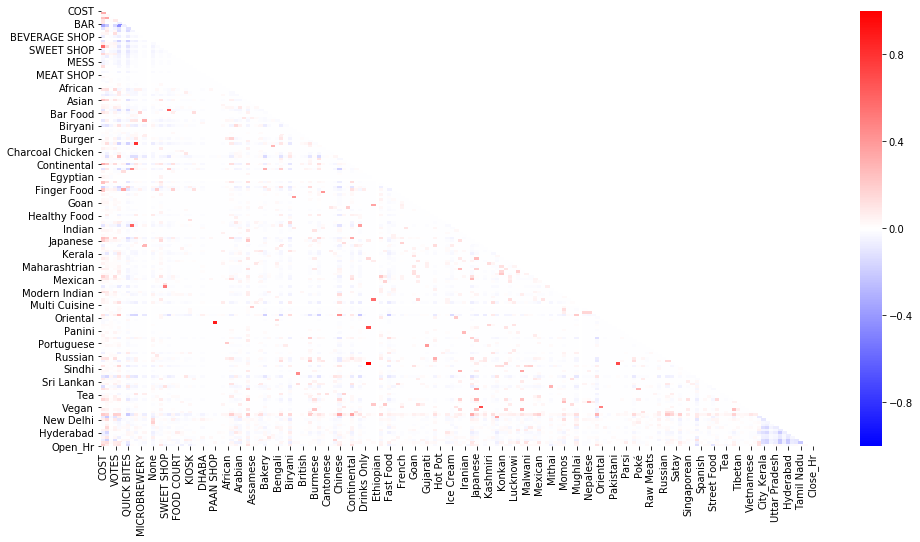

In [96]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, fmt='.1g', cmap='bwr', mask=np.triu(df.corr()))

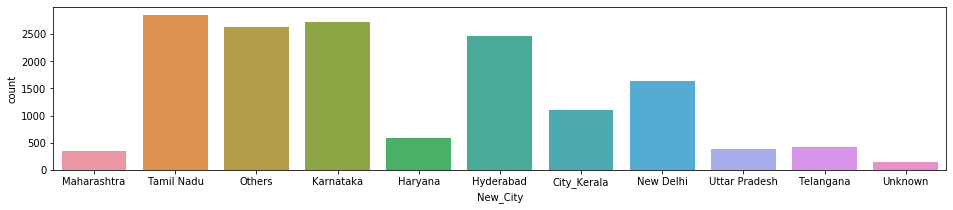

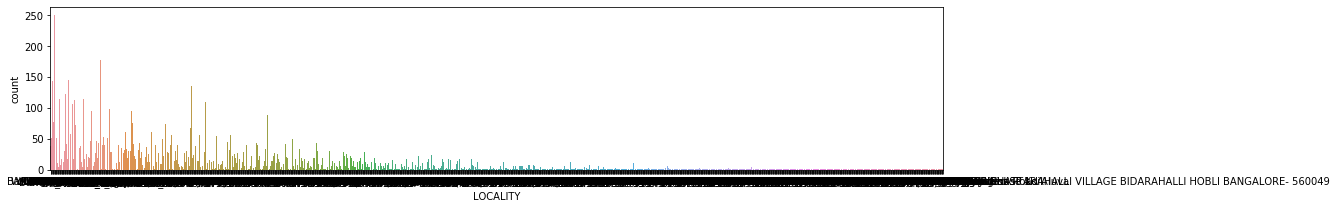

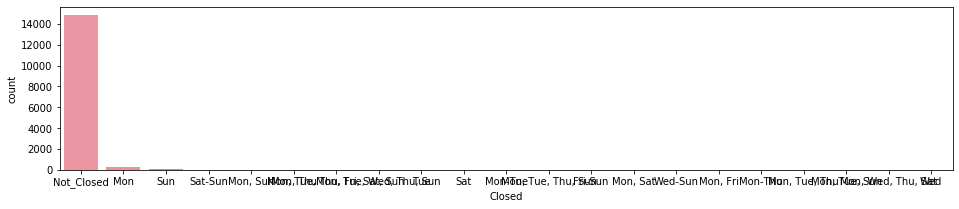

In [92]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

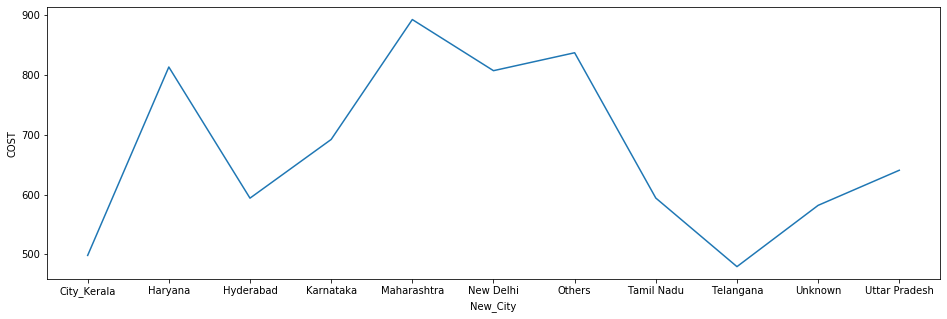

In [93]:
plt.figure(figsize=(16,5))
sns.lineplot(x='New_City', y='COST', data=df, ci=None)

Observations:
    1. New_city is negatively correlated with other features.
    2. Drinks only, Iranian, Japanese, Biriyani, Oriental, Chinese, Momos are among the few that is highly correlated.
    3. Tamilnadu and Karnataka is the maximum data that we have.
    4. Prices are less in Telangana and Kerala.
    5. We have very high prices in Maharashtra. This could be due to the high cost of living in Mumbai and nearby cities.

In [106]:
df.drop(columns=['New_City'], axis=1, inplace=True)

In [111]:
df['Open_Hr'].fillna(0, inplace=True)
df['Open_Hr'] = df['Open_Hr'].astype(int)
df['Close_Hr'].fillna(0, inplace=True)
df['Close_Hr'] = df['Close_Hr'].astype(int)

In [125]:
df=pd.get_dummies(df)
df.shape

(15315, 1593)

In [126]:
df[df['COST'].isna()].head(2)

,COST,RATING,RESTAURANT_ID,VOTES,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,...,"Closed_Mon, Wed, Thu, Sat",Closed_Mon-Thu,Closed_Mon-Tue,Closed_Not_Closed,Closed_Sat,Closed_Sat-Sun,Closed_Sun,Closed_Tue,Closed_Wed,Closed_Wed-Sun
12690,NaN,4.3,4085,564,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12691,NaN,4.2,12680,61,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [152]:
df_train = df[0:12690]
df_test = df[12690:].drop(columns=['COST'], axis=1)
x = df_train.drop(columns=['COST'], axis=1)
y = df_train['COST']

In [153]:
x.fillna(0, inplace=True)

In [154]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [155]:
# Instanstiate PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(12690, 10)

### Machine Learning Algorithms

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (10152, 10) | x_test.shape --> (2538, 10) 
y_train.shape --> (10152,) | y_test.shape --> (2538,)


In [157]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test, score, rmse):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train, y_train)*100)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('Accuracy Score :: %0.2f' %(model.score(x_train, y_train)*100))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('>>> Error >>>')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [132]:
# Instantiate all models
lreg = LinearRegression()
knr = KNeighborsRegressor()
rr = Ridge()
lr = Lasso()
enr = ElasticNet()
svr = SVR()
dct = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [133]:
all_models={'Linear Regression': lreg,
            'K-Neighbors Regressor': knr,
            'Ridge Regression': rr,
            'Lasso Regression': lr,
            'Elastic Net': enr,
            'Support Vector Regression': svr,
            'Decision Tree Regression': dct,
            'Random Forest Regressor': rf
           }

In [158]:
score,rmse = [],[]
for i, j in all_models.items():
    print('-------------------', i, '-------------------')
    models(j, x_train, x_test, y_train, y_test, score, rmse)

------------------- Linear Regression -------------------
Accuracy Score :: 31.03
R2 Score: 0.31766099321291397
>>> Error >>>
Mean Absolute Error: 303.26603230525467
Mean Squared Error: 268482.7634856485
Root Mean Squared Error: 518.1532239460144
------------------- K-Neighbors Regressor -------------------
Accuracy Score :: 64.26
R2 Score: 0.437867680126385
>>> Error >>>
Mean Absolute Error: 267.27501970055164
Mean Squared Error: 221184.53903861306
Root Mean Squared Error: 470.30260369108424
------------------- Ridge Regression -------------------
Accuracy Score :: 31.03
R2 Score: 0.31766105109307263
>>> Error >>>
Mean Absolute Error: 303.2652439180042
Mean Squared Error: 268482.74071130203
Root Mean Squared Error: 518.1532019695546
------------------- Lasso Regression -------------------
Accuracy Score :: 31.03
R2 Score: 0.3174779814426263
>>> Error >>>
Mean Absolute Error: 303.1834313219844
Mean Squared Error: 268554.7738871476
Root Mean Squared Error: 518.2227068424806
------------

In [159]:
pd.DataFrame([all_models.keys(), score, rmse], index=['Model', 'Accuracy Score', 'RMSE']).T.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,RMSE
6,Decision Tree Regression,99.9981,729.777
7,Random Forest Regressor,92.3867,445.473
1,K-Neighbors Regressor,64.2573,470.303
0,Linear Regression,31.0271,518.153
2,Ridge Regression,31.0271,518.153
3,Lasso Regression,31.0263,518.223
4,Elastic Net,30.5398,519.967
5,Support Vector Regression,16.6799,567.572


In [160]:
cv_scores = cross_val_score(dct, x_train, y_train, cv=10)
cv_scores.mean()*100

-20.348359867050405

Conclusion:
    1. Support Vector regression is the worst model with 10.73% accuracy.
    2. We could not acheive a good score through cross validation.
    3. Ridge Regression and Lasso Regression did not improve the score from Linear Regression.
    4. As we can see, Decision Tree Regression gained 100 % accuracy and is the best model for this dataset.

In [161]:
#Exporting model as pkl file
joblib.dump(dct,'Restaurant_Food_Cost.pkl')

['Restaurant_Food_Cost.pkl']

In [162]:
# predict the value
dct.fit(x_train, y_train)
pred=dct.predict(x_test)
print("Predicted Result Price:",pred)

Predicted Result Price: [1500.    0.    0. ...  700.    0.  400.]


In [163]:
df_pred=pd.DataFrame(pred)
df_pred.to_csv('Restaurant_food_cost_prediction.csv')